# <font color='red'><b>Bootstrap assignment</b> </font>

                                                                                                   Submitted By- Rahul Dable

<b>There will be some functions that start with the word "grader" ex: grader_sampples(), grader_30().. etc, you should not change those function definition.

Every Grader function has to return True.</b>

<font color='blue'> <b>Importing packages</b> </font>

In [1]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric

In [2]:
boston = load_boston()
X=boston.data #independent variables
y=boston.target #target variable

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import itertools
import random
from sklearn import metrics
import math
from tqdm import tqdm
from joblib import dump, load

from sklearn.tree import DecisionTreeRegressor



In [4]:
dt_reg = DecisionTreeRegressor(max_depth=None, splitter='random')

## <font color='red'><b>Task 1</b></font>

<font color='red'> <b>Step - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>
    <b> Randomly create 30 samples from the whole boston data points</b>
    *  Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points
    
     For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly , consider we have selected [4, 5, 7, 8, 9, 3] now we will replicate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]
* <font color='blue'><b> Create 30 samples </b></font>
    *  Note that as a part of the Bagging when you are taking the random samples <b>make sure each of the sample will have different set of columns</b><br>
Ex: Assume we have 10 columns[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10] for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample  [7, 9, 1, 4, 5, 6, 2] and so on...
Make sure each sample will have atleast 3 feautres/columns/attributes

<font color='red'><b>Step - 2 </b></font>

<font color='blue'><b>Building High Variance Models on each of the sample and finding train MSE value</b></font>

*  Build a regression trees on each of 30 samples.
*  Computed the predicted values of each data point(506 data points) in your corpus.
*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

<font color='red'> <b>Step - 3 </b></font>

*  <font color='blue'><b>Calculating the OOB score </b></font>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.
*  Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

# <font color='red'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

# <font color='red'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
Predict the house price for this point as mentioned in the step 2 of Task 1.

# <font color='blue'> <b>Task - 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'> <b>Creating samples</b></font>

<font color='Orange'><b>Algorithm</b></font>

![alt text](https://i.imgur.com/BTVYXQ1.jpg/)

*  <font color='blue'><b> Write code for generating samples</b></font>

In [5]:
def generating_samples(input_data, target_data):
    
    '''In this function, we will write code for generating 30 samples '''
    # you can use random.choice to generate random indices without replacement
    # Please have a look at this link https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.choice.html for more details
    # Please follow above pseudo code for generating samples 
    #creating a random sample of size 60% data
    
    #creating DataFrames from the loaded data
    X = pd.DataFrame(input_data)
    y = pd.DataFrame(target_data)

    #Attaching target variable to the dataset before row and column sampling
    Data = X
    Data['Target'] = y
    
    #Data = input_data
    #Data['Target'] = target_data
    
    X1 = Data.sample(n=303, weights='Target', replace=False, axis=0, random_state= None)
    X2 = X1.sample(n = 203, weights='Target', replace=False, axis=0, random_state=None)
    X_sample = pd.concat([X1, X2], copy=True)
    

    # ROW and COLUMN sampling
    randomlist = []
    i = random.randint(4,12)
    for i in range (0, i):
        n = random.randint(3,12)
        randomlist.append(n)
    list(set(randomlist))
    

    #Training Dataset, (column sampling)
    XY_sample = X_sample.iloc[:, list(set([*randomlist, 13]))]

    #Splitting data into data and target variable
    sampled_data = XY_sample.drop('Target', axis=1)
    sampled_target = XY_sample[['Target']]
    
    selecting_rows = list(X1.index)
    selecting_columns = randomlist
    
    return sampled_data , sampled_target, selecting_rows, selecting_columns

<font color='cyan'> <b> Grader function - 1 </b> </fongt>

In [6]:
'''def grader_samples(a,b,c,d):
    length = (len(a)==506  and len(b)==506)
    sampled = (len(a)-len(set([str(i) for i in a]))==203)
    rows_length = (len(c)==303)
    column_length= (len(d)>=3)
    assert(length and sampled and rows_length and column_length)
    return True
a,b,c,d = generating_samples(X, y)
grader_samples(a,b,c,d)'''

'def grader_samples(a,b,c,d):\n    length = (len(a)==506  and len(b)==506)\n    sampled = (len(a)-len(set([str(i) for i in a]))==203)\n    rows_length = (len(c)==303)\n    column_length= (len(d)>=3)\n    assert(length and sampled and rows_length and column_length)\n    return True\na,b,c,d = generating_samples(X, y)\ngrader_samples(a,b,c,d)'

**Observation:**
Here Grader functionis throwing AssertionError. In the third line, i.e. **len(set([str(i) for i in a]))** returning number of columns while we are comparing it with number of rows. 

*  <font color='blue'> <b>Create 30 samples </b>

![alt text](https://i.imgur.com/p8eZaWL.jpg)

In [7]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list
list_input_data =[]
list_output_data =[]
list_selected_row= []
list_selected_columns=[]

for i in range(0,30,1):
    a,b,c,d = generating_samples(X, y)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_row.append(c)
    list_selected_columns.append(d)

<font color='cyan'> <b>Grader function - 2 </b></font>

In [8]:
def grader_30(a):
    assert(len(a)==30 and len(a[0])==506)
    return True
grader_30(list_input_data)

True

<br>

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

*  <font color='blue'><b> Write code for building regression trees</b></font>

We have Input Data  and Target Variable Stored in list_input_data and list_output_data respectively. Need to fit model in each sample and store in a list.

**With Joblib**

In [9]:
#Training Base Models
from joblib import dump, load

model_names_joblib = []
model_names = []
list_of_all_models = []
for i in range(0,len(list_input_data),1):
    #print("model {}".format(i))
    joblib_ = str("Model_") + str(i) + str(".joblib")
    model_ = str("Model_") + str(i)
    model_names.append(model_)
    model_names_joblib.append(joblib_)
    list_of_all_models.append(model_)
#print(model_names_joblib)
#print(model_names)

for i in range(0,len(list_input_data),1):
    model = dt_reg.fit(list_input_data[i], list_output_data[i])
    list_of_all_models[i] = dump(model, model_names_joblib[i])

#list_of_all_models

Check if models are fitted correctly w.r.t. input sampled data

In [10]:
i = 11
clf = load(*list_of_all_models[i])
print("Number of features for Model{0} is {1}".format(i, clf.n_features_))
print("Number of features in sample input {0} is {1}".format(i, len(list_input_data[i].columns)))

Number of features for Model11 is 6
Number of features in sample input 11 is 6


After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

In [11]:
def evaluate_reg(y_true:"true class label",
                 y_pred:"predicted class label") -> 'returns performance measures':
    #print("Variance Score is         :", metrics.explained_variance_score(y_true, y_pred))
    #print("Mean Absolute Error is    :", metrics.mean_absolute_error(y_true, y_pred))
    #print("Mean Squared Log Error is :", metrics.mean_squared_log_error(y_true, y_pred))
    print("Mean Squared Error is     :", metrics.mean_squared_error(y_true, y_pred))
    #print("R2 Score, the coefficient of determination is :", metrics.r2_score(y_true, y_pred))
    #print("-"*66)

Training with joblib models

In [12]:

baselearner_outputs = []
X_df = pd.DataFrame(X)

predicted_op = []
output_df = pd.DataFrame(index=X_df.index)
output_model_list = []

for i in range(0,len(list_input_data),1):
    #Train each baselearner model w.r.t. input sampled data
    baselearner = load(*list_of_all_models[i])
    
    #Column Sampling of whole data based on the columns of input sampled data
    X_column_sampled = X_df.loc[:, list(list_input_data[i].columns)]
    
    #Predicting target variable w.r.t. each baselearner model
    y_pred = baselearner.predict(X_column_sampled)
    #print(y_pred)   
    
    #Store output of each baselearner w.r.t. all datapoints
    predicted_op.append(y_pred)

'''output_predicted_all_list = []
for i in range(0, len(list_input_data),1):
    #Create dataframe from oob index and predicted values
    output_model = []
    output_model = pd.DataFrame(predicted_op[i], index=list_input_data[i].index, columns=['Model_'+ str(i)])
    output_model_list.append(output_model)
    
    #Join above output with main dataframe containing index of all the datapoints

#as we have replicated 203 points earlier in the sample input data, dropping duplicate entries
for each_model in output_model_list:
    each_model = each_model.reset_index()
    each_model = each_model.drop_duplicates(['index'])
    each_model = each_model.set_index(['index'])
    output_df = output_df.merge(each_model, how="outer", left_index=True, right_index=True)'''
    
'''output_df = predicted_op   
output_df['y_pred'] = output_df.median(axis=1, skipna=True)
output_df['y_true'] = y

output_df.head(3)'''

output_ = pd.DataFrame(predicted_op)
output_df = output_.T
output_df.columns = model_names

#output_df['y_pred'] = np.round(output_df.median(axis=1, skipna=True),2)
output_df['y_pred'] = np.round(output_df.mean(axis=1, skipna=True),2)
output_df['y_true'] = y
output_df.head()

,Model_0,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,...,Model_22,Model_23,Model_24,Model_25,Model_26,Model_27,Model_28,Model_29,y_pred,y_true
0,32.7,29.4,29.8,24.0,20.650000,24.0,24.0,32.7,24.0,24.0,...,24.0,24.0,24.0,18.9,24.0,24.0,24.0,24.0,25.70,24.0
1,39.8,21.6,21.6,21.6,33.666667,22.2,16.5,23.6,39.8,21.6,...,21.6,21.6,21.6,21.6,22.6,21.6,22.6,21.6,23.73,21.6
2,44.8,34.7,50.0,34.7,34.700000,34.7,31.2,34.7,34.7,34.7,...,28.7,34.7,34.7,34.7,34.7,34.7,28.7,34.7,35.02,34.7
3,33.4,33.4,33.4,33.4,33.400000,33.4,33.4,33.4,33.4,24.8,...,33.4,33.4,33.1,33.4,33.4,33.4,34.9,50.0,33.90,33.4
4,28.7,36.2,34.9,36.2,25.170000,36.2,36.2,36.2,36.2,28.7,...,36.2,33.0,36.2,36.2,33.0,36.2,36.2,28.7,34.28,36.2


#### Compute MSE

<font color='orange'><b>Flowchart for calculating MSE </b></font>

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

![alt text](https://i.imgur.com/sPEE618.png)

*  <font color='blue'><b> Write code for calculating MSE</b></font>

**Lets try computing MSE by formula**

In [13]:
output_ = pd.DataFrame(predicted_op)
output_df = output_.T
output_df.columns = model_names

#Using Median
output_df['y_pred'] = np.round(output_df.median(axis=1, skipna=True),2)

#Using Mean
#output_df['y_pred'] = np.round(output_df.mean(axis=1, skipna=True),2)

output_df['y_true'] = y
output_df.head()

,Model_0,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,...,Model_22,Model_23,Model_24,Model_25,Model_26,Model_27,Model_28,Model_29,y_pred,y_true
0,32.7,29.4,29.8,24.0,20.650000,24.0,24.0,32.7,24.0,24.0,...,24.0,24.0,24.0,18.9,24.0,24.0,24.0,24.0,24.0,24.0
1,39.8,21.6,21.6,21.6,33.666667,22.2,16.5,23.6,39.8,21.6,...,21.6,21.6,21.6,21.6,22.6,21.6,22.6,21.6,21.6,21.6
2,44.8,34.7,50.0,34.7,34.700000,34.7,31.2,34.7,34.7,34.7,...,28.7,34.7,34.7,34.7,34.7,34.7,28.7,34.7,34.7,34.7
3,33.4,33.4,33.4,33.4,33.400000,33.4,33.4,33.4,33.4,24.8,...,33.4,33.4,33.1,33.4,33.4,33.4,34.9,50.0,33.4,33.4
4,28.7,36.2,34.9,36.2,25.170000,36.2,36.2,36.2,36.2,28.7,...,36.2,33.0,36.2,36.2,33.0,36.2,36.2,28.7,36.2,36.2


In [14]:
MSE_score = 0
for i in range(len(output_df)):
    err = math.pow((output_df.y_pred[i] - output_df.y_true[i]), 2)
    MSE_score += err
MSE_score /= len(output_df)
print("MSE_SCORE is", MSE_score)

MSE_SCORE is 0.7911166007905138


**Using sklearn.metrics**

In [15]:
evaluate_reg(output_df.y_true, output_df.y_pred)

Mean Squared Error is     : 0.7911166007905139


<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> Write code for calculating OOB score </b></font>

In [16]:
#creating DataFrames from the loaded data
X = pd.DataFrame(boston.data)
y = pd.DataFrame(boston.target)

#Attaching target variable to the dataset before row and column sampling
Data = X
Data['Target'] = y

#Creating empty list to store the iteration results
oob_predicted_list = []
oob_index_list = []
baselearner_oob_op = []
base_learner_prediction_all = []
base_learner_mse = []
base_learner_oob_score = []
oob_df = pd.DataFrame(index=X_df.index)

for i in range (0, len(list_input_data),1):
    
    X1 = Data.sample(n=303, weights='Target', replace=False, axis=0, random_state= None)
    X2 = X1.sample(n = 203, weights='Target', replace=False, axis=0, random_state=None)
    X_sample = pd.concat([X1, X2], copy=True)
    

    # ROW and COLUMN sampling
    randomlist = []
    i = random.randint(4,12)
    for i in range (0, i):
        n = random.randint(3,12)
        randomlist.append(n)
    list(set(randomlist))
    
    #Training Dataset, (column sampling)
    XY_sample = X_sample.iloc[:, list(set([*randomlist, 13]))]

    #Splitting data into data and target variable
    sampled_data = XY_sample.drop('Target', axis=1)
    sampled_target = XY_sample[['Target']]
    
    
    # for OOB points
    a = list(X1.index)
    b = list(Data.index)

    #selecting oob points i.e. Test dataset
    oob_index = list(set(b) - set(a))
    oob_index_list.append(oob_index)
    oob_points = Data.iloc[oob_index, :]
    
    #Column Sampling w.r.t. base learner
    oob_sample = oob_points.iloc[:, list(set([*randomlist, 13]))] 

    #spliting data into X and Y
    oob_data = oob_sample.drop('Target', axis=1)
    oob_target = oob_sample[['Target']]

    #Fitting the data in DecisionTreeRegression model.
    dt_reg = DecisionTreeRegressor()
    dt_reg.fit(sampled_data, sampled_target)

    #Predicting target variables of oob datapoints.
    oob_predicted = dt_reg.predict(oob_data)
    oob_predicted_list.append(oob_predicted)

oob_predicted_all_list = []
for i in range (0, len(list_input_data),1):
    #Create dataframe from oob index and predicted values
    oob_model_output = []
    oob_model_output = pd.DataFrame(oob_predicted_list[i], index=oob_index_list[i], columns=['Model_'+ str(i)])
    oob_predicted_all_list.append(oob_model_output)
    #Join above output with main dataframe containing index of all the datapoints

for each_output in oob_predicted_all_list:
    oob_df = oob_df.merge(each_output, how="outer", left_index=True, right_index=True)

oob_df['y_true'] = y
oob_df['y_pred'] = oob_df.median(axis=1, skipna=True)
oob_df.head()

,Model_0,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,...,Model_22,Model_23,Model_24,Model_25,Model_26,Model_27,Model_28,Model_29,y_true,y_pred
0,NaN,NaN,29.4,29.8,NaN,NaN,NaN,NaN,23.5,38.7,...,NaN,NaN,NaN,30.5,NaN,NaN,NaN,NaN,24.0,28.90
1,21.6,NaN,NaN,20.6,NaN,NaN,22.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.7,21.6,21.60
2,NaN,NaN,NaN,NaN,NaN,21.6,NaN,NaN,NaN,43.8,...,NaN,NaN,NaN,33.1,NaN,21.6,NaN,35.4,34.7,33.10
3,NaN,36.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.8,...,19.6,NaN,32.0,37.3,30.1,23.9,NaN,46.0,33.4,34.75
4,28.7,28.4,NaN,NaN,37.3,NaN,NaN,NaN,NaN,NaN,...,26.6,33.4,NaN,NaN,34.7,21.8,NaN,NaN,36.2,33.40


**OOB SCORE:**

In [17]:
oob_score = 0
for i in range(len(oob_df)):
    err = math.pow((oob_df.y_pred[i] - oob_df.y_true[i]), 2)
    oob_score += err
oob_score /= len(oob_df)
print("OOB_SCORE is", oob_score)

OOB_SCORE is 10.23848383956815


# <font color='blue'><b>Task 2</b></font>

**Let's Create Required Functions**

In [18]:
def random_forest(input_data, target_data, baselearners = 30):
    
    #creating DataFrames from the loaded data
    X = pd.DataFrame(input_data)
    y = pd.DataFrame(target_data)
    
    X_df = pd.DataFrame(X)
    #Attaching target variable to the dataset before row and column sampling
    Data = X
    Data['Target'] = y

    #Creating empty list to store the iteration results
    oob_predicted_list = []
    oob_index_list = []
    predicted_op = []

    list_input_data = []
    list_output_data = []

    output_model_list = []
    list_oob_data = []
    list_oob_target = []

    output_df = pd.DataFrame(index=X_df.index)
    oob_df = pd.DataFrame(index=X_df.index)

    #1.Creating input samples
    for i in range (0, 30,1):

        X1 = Data.sample(n=303, weights='Target', replace=False, axis=0, random_state= None)
        X2 = X1.sample(n = 203, weights='Target', replace=False, axis=0, random_state=None)
        X_sample = pd.concat([X1, X2], copy=True)


        # ROW and COLUMN sampling
        randomlist = []
        i = random.randint(4,12)
        for i in range (0, i):
            n = random.randint(3,12)
            randomlist.append(n)
        list(set(randomlist))

        #Training Dataset, (column sampling)
        XY_sample = X_sample.iloc[:, list(set([*randomlist, 13]))]

        #Splitting data into data and target variable
        sampled_data = XY_sample.drop('Target', axis=1)
        sampled_target = XY_sample[['Target']]

        list_input_data.append(sampled_data)
        list_output_data.append(sampled_target)

    #2.Training Baselearners

    from joblib import dump, load

    model_names_joblib = []
    model_names = []
    list_of_all_models = []
    for i in range(0,len(list_input_data),1):
        #print("model {}".format(i))
        joblib_ = str("Model_") + str(i) + str(".joblib")
        model_ = str("Model_") + str(i)
        model_names_joblib.append(joblib_)
        list_of_all_models.append(model_)
    #print(model_names_joblib)
    #print(model_names)

    for i in range(0,len(list_input_data),1):
        model = dt_reg.fit(list_input_data[i], list_output_data[i])
        list_of_all_models[i] = dump(model, model_names_joblib[i])

    #3. Predicting y with baseleaners
    baselearner_outputs = []
    X_df = pd.DataFrame(X)

    predicted_op = []
    output_df = pd.DataFrame(index=X_df.index)
    output_model_list = []

    for i in range(0,len(list_input_data),1):
        #Train each baselearner model w.r.t. input sampled data
        baselearner = load(*list_of_all_models[i])

        #Column Sampling of whole data based on the columns of input sampled data
        X_column_sampled = X_df.loc[:, list(list_input_data[i].columns)]

        #Predicting target variable w.r.t. each baselearner model
        y_pred = baselearner.predict(X_column_sampled)
        #print(y_pred)   

        #Store output of each baselearner w.r.t. all datapoints
        predicted_op.append(y_pred)

    '''output_predicted_all_list = []
    for i in range(0, len(list_input_data),1):
        #Create dataframe from oob index and predicted values
        output_model = []
        output_model = pd.DataFrame(predicted_op[i], index=list_input_data[i].index, columns=['Model_'+ str(i)])
        output_model_list.append(output_model)

        #Join above output with main dataframe containing index of all the datapoints

    #as we have replicated 203 points earlier in the sample input data, dropping duplicate entries
    for each_model in output_model_list:
        each_model = each_model.reset_index()
        each_model = each_model.drop_duplicates(['index'])
        each_model = each_model.set_index(['index'])
        output_df = output_df.merge(each_model, how="outer", left_index=True, right_index=True)


    output_df['y_pred'] = output_df.median(axis=1, skipna=True)
    output_df['y_true'] = y'''
    output_ = pd.DataFrame(predicted_op)
    output_df = output_.T
    #output_df.columns = model_names

    #Using Median
    output_df['y_pred'] = np.round(output_df.median(axis=1, skipna=True),2)
    #Using Mean
    #output_df['y_pred'] = np.round(output_df.mean(axis=1, skipna=True),2)
    output_df['y_true'] = y
    output_df.head()

    #4. Computing OOB Points
    for i in range(0,len(list_input_data),1):
        # for OOB points
        a = list(list_input_data[i].index)
        b = list(Data.index)

        #selecting oob points i.e. Test dataset
        oob_index = list(set(b) - set(a))
        oob_index_list.append(oob_index)
        oob_points = Data.iloc[oob_index, :]

        #Column Sampling w.r.t. base learner
        oob_sample = oob_points.iloc[:, list(list_input_data[i].columns)+[13]]

        #spliting data into X and Y
        oob_data = oob_sample.drop('Target', axis=1)
        oob_target = oob_sample[['Target']]

        list_oob_data.append(sampled_data)
        list_oob_target.append(sampled_target)


        #Predicting target variables of oob datapoints.
        baselearner = load(*list_of_all_models[i])
        oob_predicted = np.round(baselearner.predict(oob_data),2)
        oob_predicted_list.append(oob_predicted)

    oob_predicted_all_list = []
    for i in range (0, len(list_input_data),1):
        #Create dataframe from oob index and predicted values
        oob_model_output = []
        oob_model_output = pd.DataFrame(oob_predicted_list[i], index=oob_index_list[i], columns=['Model_'+ str(i)])
        oob_predicted_all_list.append(oob_model_output)
        #Join above output with main dataframe containing index of all the datapoints

    for each_output in oob_predicted_all_list:
        oob_df = oob_df.merge(each_output, how="outer", left_index=True, right_index=True)

    oob_df['y_true'] = y
    oob_df['y_pred'] = oob_df.median(axis=1, skipna=True)
    #print(oob_df.head())
    
    return oob_df, output_df

In [19]:
def compute_obb_score(oob_df):
    oob_score = 0
    for i in range(len(oob_df)):
        err = math.pow((oob_df.y_pred[i] - oob_df.y_true[i]), 2)
        oob_score += err
    oob_score /= len(oob_df)
    return oob_score

In [20]:
def compute_MSE(output):
    MSE = metrics.mean_squared_error(output.y_true, output.y_pred)
    return MSE

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

In [21]:
input_data = boston.data
target_data = boston.target

In [22]:
MSE = []
OOB_SCORE = []

for i in tqdm(range(0,35,1)):
    oob_df, output_df = random_forest(input_data, target_data, baselearners = 30)
    mse = compute_MSE(output_df)
    MSE.append(mse)
    oob_score = compute_obb_score(oob_df)
    OOB_SCORE.append(oob_score)

100%|██████████| 35/35 [01:12<00:00,  2.07s/it]


95.0 confidence interval of MSE 0.6 and 0.7
95.0 confidence interval of OOB Score 9.9 and 10.9
------------------------------------------------------------------


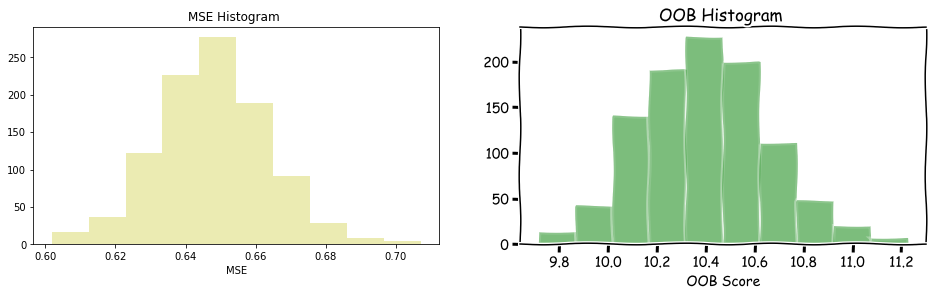

In [23]:
#Computing Confidence Interval
mse_CI = np.array(MSE)
oob_CI = np.array(OOB_SCORE)
n_iteration = 1000


#Plotting 
import matplotlib.pyplot as plt
from sklearn.utils import resample

plt.figure(figsize=(16,4))

plt.subplot(121)
mse_mean = []
n_size = int(len(mse_CI))
for i in range(n_iteration):
    s = resample(mse_CI, n_samples= n_size)
    m = np.mean(s)
    mse_mean.append(m)
plt.hist(mse_mean, color='y', alpha = 0.3)
plt.title("MSE Histogram ")
plt.xlabel("MSE")
plt.xkcd(scale=0.8)

alpha = 0.95
p_lower = ((1 - alpha)/2)*100
lower = np.percentile(mse_mean, p_lower)
p_upper = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(mse_mean, p_upper)

print('%.1f confidence interval of MSE %.1f and %.1f' % (alpha*100, lower, upper))

plt.subplot(122)

oob_mean = []
n_size = int(len(oob_CI))
for i in range(n_iteration):
    s = resample(oob_CI, n_samples= n_size)
    m = np.mean(s)
    oob_mean.append(m)
plt.hist(oob_mean, color='g', alpha = 0.3)
plt.title("OOB Histogram ")
plt.xlabel("OOB Score")
plt.xkcd(scale=0.8)

alpha = 0.95
p_lower = ((1 - alpha)/2)*100
lower = np.percentile(oob_mean, p_lower)
p_upper = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(oob_mean, p_upper)

print('%.1f confidence interval of OOB Score %.1f and %.1f' % (alpha*100, lower, upper))
print("-"*66)


# <font color='red'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

*  <font color='blue'><b> Write code for TASK 3 </b></font>

**Given Query Point:**

In [24]:
xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60]

**Formatting Given Query Point into Required Format i.e. List of Dataframe**

In [25]:
list_query_data = []
xq_df = pd.DataFrame(xq).T
list_query_data.append(xq_df)
list_query_data[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.18,20.0,5.0,0.0,0.421,5.6,72.2,7.95,7.0,30.0,19.1,372.13,18.6


**Training Base Learners**

In [26]:
#Training Base Models
from joblib import dump, load

model_names_joblib = []
model_names = []
list_of_all_models = []
for i in range(0,len(list_input_data),1):
    #print("model {}".format(i))
    joblib_ = str("Model_") + str(i) + str(".joblib")
    model_ = str("Model_") + str(i)
    model_names_joblib.append(joblib_)
    list_of_all_models.append(model_)
#print(model_names_joblib)
#print(model_names)

for i in range(0,len(list_input_data),1):
    model = dt_reg.fit(list_input_data[i], list_output_data[i])
    list_of_all_models[i] = dump(model, model_names_joblib[i])

#list_of_all_models

**Feeding Data to each base model and predicting the output**

In [27]:
predicted_yq = []
for i in tqdm(range(0,30,1)):
    #Train each baselearner model w.r.t. input sampled data
    baselearner = load(*list_of_all_models[i])

    #Column Sampling of whole data based on the columns of input sampled data
    Xq_column_sampled = list_query_data[0].loc[:, list(list_input_data[i].columns)]

    #Predicting target variable w.r.t. each baselearner model
    yq_pred = baselearner.predict(Xq_column_sampled)
    #print(y_pred)   

    #Store output of each baselearner w.r.t. all datapoints
    predicted_yq.append(*list(yq_pred))

100%|██████████| 30/30 [00:01<00:00, 27.34it/s]


In [28]:
from statistics import median
house_price = median(predicted_yq)
print("The House Price is:", house_price)

The House Price is: 18.950000000000003


<font color='red'><b>Write observations for task 1, task 2, task 3 indetail</b></font>

#### TASK 01 OBSERVATIONS: 
- In this task, we have performed row and column sampling to create number of sampled datasets from the given dataset and part of the dataset is reserved for testing i.e. OOB points.
- We have feeded all these sample to train base models and predicted the target values of oob points.
- From the predicted values, computed MSE for input sampled datapoints and OOB_SCORE for oob points.

#### TASK 02 OBSERVATIONS: 
- In the task two, we have sampled 303 points and rest of the points (OOB) are considered as a test data. If we compare oob_df and output_df, It is clear that all the missing values i.e. NaN indicated that the particular data point has not beed feeded to that respective model.
- 95.0 confidence interval of MSE 0.6 and 0.7
- 95.0 confidence interval of OOB Score 9.7 and 10.6

In [29]:
oob_df.head()

,Model_0,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,...,Model_22,Model_23,Model_24,Model_25,Model_26,Model_27,Model_28,Model_29,y_true,y_pred
0,NaN,NaN,NaN,23.2,NaN,NaN,NaN,35.1,22.8,NaN,...,NaN,NaN,NaN,29.8,NaN,NaN,NaN,NaN,24.0,24.30
1,NaN,NaN,NaN,34.7,25.0,NaN,NaN,NaN,22.9,22.6,...,NaN,NaN,NaN,NaN,NaN,32.5,NaN,22.0,21.6,22.60
2,NaN,NaN,NaN,NaN,NaN,33.1,NaN,NaN,NaN,NaN,...,21.60,NaN,NaN,NaN,NaN,34.9,NaN,NaN,34.7,34.90
3,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,34.7,NaN,NaN,NaN,NaN,33.4,34.05
4,NaN,NaN,NaN,33.0,NaN,NaN,NaN,34.9,NaN,NaN,...,31.05,NaN,NaN,NaN,28.7,NaN,NaN,NaN,36.2,33.10


In [30]:
output_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,y_pred,y_true
0,24.0,24.0,24.0,23.2,24.0,24.0,24.0,35.1,22.8,24.0,...,24.00,24.0,24.0,29.8,24.0,24.0,24.0,24.0,24.0,24.0
1,21.6,21.6,21.6,34.7,25.0,21.6,21.6,21.6,22.9,22.6,...,21.60,21.6,21.6,21.6,21.6,32.5,21.6,22.0,21.6,21.6
2,34.7,34.7,34.7,34.7,34.7,33.1,34.7,34.7,34.7,34.7,...,21.60,34.7,34.7,34.7,34.7,34.9,34.7,34.7,34.7,34.7
3,33.4,33.4,33.4,33.0,33.4,33.4,33.4,33.4,33.4,33.4,...,31.05,33.4,33.4,34.7,33.4,33.4,33.4,33.4,33.4,33.4
4,36.2,36.2,36.2,33.0,36.2,36.2,36.2,34.9,36.2,36.2,...,31.05,36.2,36.2,36.2,28.7,36.2,36.2,36.2,36.2,36.2


#### TASK 03 OBSERVATIONS: 
- The predicted values of all the base models for the given query points are:

In [31]:
print("Output of all the base models are :", predicted_yq)


Output of all the base models are : [23.1, 26.4, 19.4, 24.3, 17.6, 18.8, 19.1, 17.6, 19.4, 22.5, 17.3, 22.5, 17.6, 22.5, 19.4, 18.5, 13.9, 17.2, 17.8, 19.7, 18.5, 18.5, 20.0, 18.5, 21.7, 19.1, 18.5, 20.0, 18.5, 14.3]


We have computed median of above outputs to compute predicted value of the given dataset.